<a href="https://colab.research.google.com/github/XyonX/pytorch-demo/blob/main/pytorch_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn # contains newral network fucntions
import matplotlib.pyplot as plt

# check pytorch version
torch.__version__

'2.1.0+cu121'

In [3]:
# create known parameters
weight = 0.7
bias = 0.3

# create data points
start = 0
end = 1
step = 0.02

# Generate input data (X)
X = torch.arange(start, end, step).unsqueeze(dim=1)

# Generate output data (y) using a linear equation: y = weight * X + bias
y = weight * X + bias

# Display the first 10 data points
print("First 10 data points:")
print("X:", X[:10])
print("y:", y[:10])


First 10 data points:
X: tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
y: tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])


In [ ]:
len(X), len(y)

(50, 50)

In [4]:
#create a train/test split
train_split = int(0.8* len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

In [5]:
def plot_predictions( train_data = X_train,
                     train_labels=y_train,
                      test_data = X_test,
                      test_labels=y_test,
                      predictions=None
                      ):
  '''
  plots training data, test data and compares predictions
  '''

  plt.figure(figsize=(10,7))

  #plot training data
  plt.scatter(train_data,train_labels, c="b", s=4, label="Training data")

  #plot test data
  plt.scatter(test_data, test_labels, c="g", s=4, label="Test Data")

  if predictions is not None:
    #plot the preditcions
    plt.scatter(test_data,predictions,c="r", s=4, label = "Predictions" )

    #show the legends
    plt.legend(prop={"size":14});


In [ ]:
plot_predictions()

In [15]:
from torch import nn
## building our first pyorch model

## create a linear regression model first

class LinearRegressionModel(nn.Module): # Because almost everything from pytorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights=nn.Parameter(torch.randn(1,
                                          requires_grad=True,
                                          dtype=torch.float))
    self.bias=nn.Parameter(torch.randn(1,
                                          requires_grad=True,
                                          dtype=torch.float))
  #forward method to define the computation in the model
  def forward(self, x:torch.Tensor)-> torch.Tensor: # x is the input data
    return self.weights* x + self.bias # this is a linear regression formula


### pytorch model building essentials
* torch.nn - contains all of the building block for the computational graph
* torch.nn.Parameter - What parameter should our model try and learn, often a pytorch layer from torch.nn will set these for us
*torch.nn.Module - The base class for all neural network modules, if you subclass it, you should override the forward()
* torch.optim -this where the optimizer  in python live, they will help gradient descent
*def forward()-All nn.module subclass require you to overrite forward

In [16]:
#create a random seed
torch.manual_seed(42)

#create an instanc e of the model
model_0 = LinearRegressionModel()

#check out the parameters
list(model_0.parameters())





[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [17]:
#List names parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [18]:
#making prediction wiht model
# this inference mode makes the prediction faster
# or we can use directly like this y_preds = model_0(X_test) to get the output
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds


tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

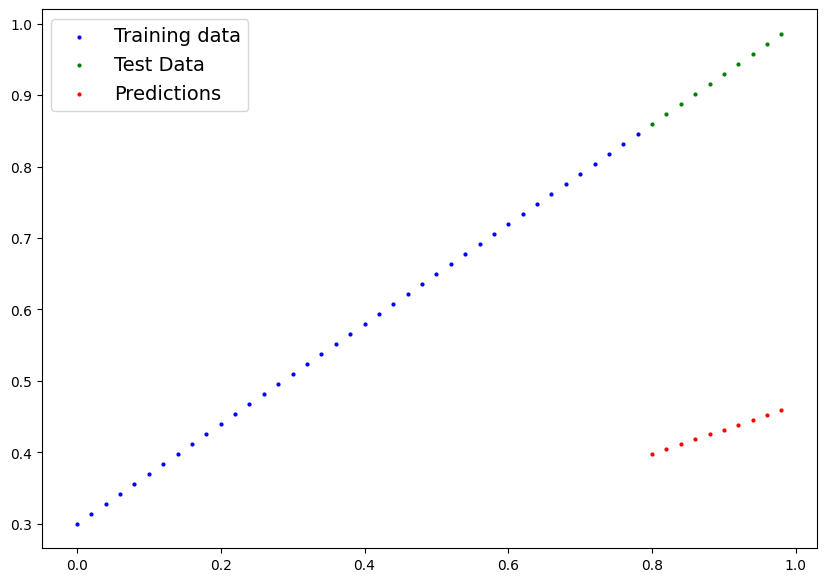

In [21]:
plot_predictions(predictions=y_preds)

# Data
###Data could be anything
1. Excel spreadsheet
2. images
3. video
4. Audio

##ML Is a game of two parts:
  1. Get data into a numberical representaion
  2. Build a model to learn patterns in that numerical representation
  


## Number of models data we are gonna build

Set can be considered as the material or data need to evaluate the result
 1. Training set # To do the model testign
 2. Validation set # Optional
 3. Testing set # The final set


What will the model do :
- start with random values
- Look at training data and adjust the random values to better represent the ideal values

How does it do so
- Through two main algorithm
- Backpropagation



